In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import trange, tqdm

# 1. Import Data and Exploratory Analysis

## 1.1 Import Data

In [2]:
# Get proper file path separator for current OS
s = os.path.sep

In [3]:
# Import training data
ziptrain = pd.read_csv("D:" + s + "2022 Spring" + s + "ISYE7406" + s + "HW" + s + "HW1" + s + "zip.train.csv", 
                      header = None)

In [4]:
# Import test data
ziptest = pd.read_csv("D:" + s + "2022 Spring" + s + "ISYE7406" + s + "HW" + s + "HW1" + s + "zip.test.csv", 
                      header = None)

In [5]:
# Only keep training data for 2 and 7
train_mask = (ziptrain[0] == 2) | (ziptrain[0] == 7)
ziptrain27 = ziptrain[train_mask].reset_index(drop = True)

In [6]:
# Only keep test data for 2 and 7
test_mask = (ziptest[0] == 2) | (ziptest[0] == 7)
ziptest27 = ziptest[test_mask].reset_index(drop = True)

## 1.2 Display individual pixel image

In [7]:
# Write a function to display individual pixel image
def show_image(df, row_index):
    image = df.iloc[row_index, 1:257]
    image_matrix = image.values.reshape(16, 16)
    plt.imshow(image_matrix, cmap='gray')
    plt.title("16*16 Grayscale Image")

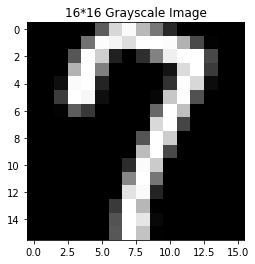

In [8]:
# Show the image of row 0 in training set
show_image(ziptrain27, 0)

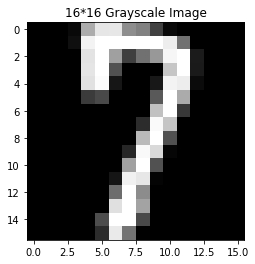

In [9]:
# Show the image of row 3 in training set
show_image(ziptrain27, 3)

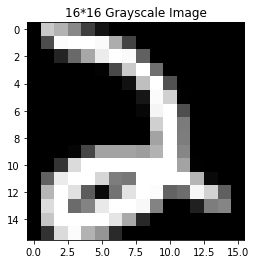

In [10]:
# Show the image of row 0 in testing set
show_image(ziptest27, 0)

## 1.3 Calculate standard deviation for each variable

Text(0, 0.5, 'Standard Deviation')

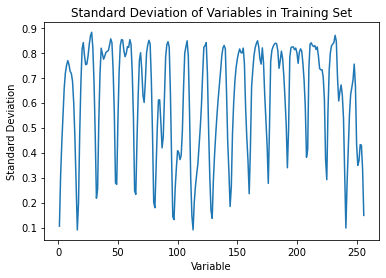

In [11]:
# Plot the standard deviation of each variable in training set
ziptrain27.describe().loc["std",1:257].plot()
plt.title("Standard Deviation of Variables in Training Set")
plt.xlabel("Variable")
plt.ylabel("Standard Deviation")

Text(0, 0.5, 'Standard Deviation')

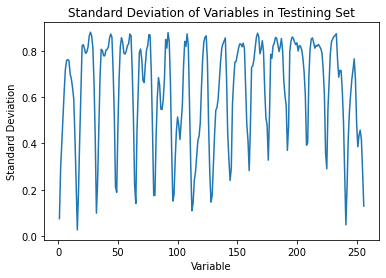

In [12]:
# Plot the standard deviation of each variable in testing set
ziptest27.describe().loc["std",1:257].plot()
plt.title("Standard Deviation of Variables in Testining Set")
plt.xlabel("Variable")
plt.ylabel("Standard Deviation")

## 1.4 Check whether the data set is balanced or not

In [13]:
# Count the number of 2 and 7 in training set
ziptrain27.groupby(0).count()[1]

0
2    731
7    645
Name: 1, dtype: int64

In [14]:
# Calculate the percentage of 2 in traning set
731 / (731 + 645)

0.53125

In [15]:
# Count the number of 2 and 7 in testing set
ziptest27.groupby(0).count()[1]

0
2    198
7    147
Name: 1, dtype: int64

In [16]:
# Calculate the percentage of 2 in testing set
198 / (198 + 147)

0.5739130434782609

## 1.5 Correlation of the variables

In [17]:
# Calculate correlation in the training set
corr = ziptrain27.corr()

In [18]:
# Only show strong correlation
corr_mask = (corr.abs() < 0.7)

Text(0.5, 1.0, 'Correlation Heatmap for ziptrain27 Data set')

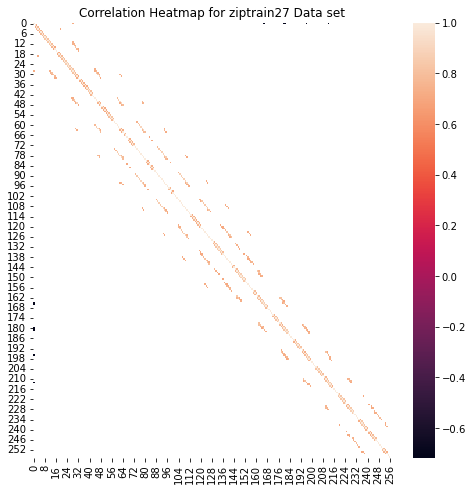

In [19]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr, mask = corr_mask)
plt.title("Correlation Heatmap for ziptrain27 Data set")

# 2. Linear Regression, KNN, and Errors

In [20]:
# Train and test data
X_train = ziptrain27.iloc[:, 1:257]
Y_train = ziptrain27.iloc[:, 0]

X_test = ziptest27.iloc[:, 1:257]
Y_test = ziptest27.iloc[:, 0]

## 2.1 Linear Regression and Errors

In [21]:
# Fit a Linear Regression model
reg = LinearRegression(n_jobs = -1)
reg.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [22]:
# Make prediction using X_train 
Y_train_pred = [7 if x>=4.5 else 2 for x in reg.predict(X_train)]

In [23]:
# Calculate training error for Linear Regression
train_error = sum(Y_train_pred != Y_train) / len(Y_train_pred)
train_error

0.0007267441860465116

In [24]:
# Make prediction using X_test
Y_test_pred = [7 if x>=4.5 else 2 for x in reg.predict(X_test)]

In [25]:
# Calculate testing error for Linear Regression
test_error = sum(Y_test_pred != Y_test) / len(Y_test_pred)
test_error

0.017391304347826087

## 2.2 KNN and Errors

In [26]:
# Create lists to store k value, training error, and testing error
k_val_list = []
train_error_list = []
test_error_list = []

In [27]:
# Use a loop to try different k value for KNN classifier
for k in tqdm(range(1, 17, 2)):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, Y_train)
    
    # Make prediction using X_train
    Y_train_pred = knn.predict(X_train)
    # Calculate training error
    train_error = sum(Y_train_pred != Y_train) / len(Y_train_pred)
    
    # Make prediction using X_test
    Y_test_pred = knn.predict(X_test)
    # Calculate testing error
    test_error = sum(Y_test_pred != Y_test) / len(Y_test_pred)
    
    # Store the results in corresponding lists
    k_val_list.append(k)
    train_error_list.append(train_error)
    test_error_list.append(test_error)

  0%|          | 0/8 [00:00<?, ?it/s]

In [28]:
# Combine the errors with different k values into a dataframe
knn_errors = pd.DataFrame({'k_value':k_val_list, 'training_err':train_error_list, 'testing_err':test_error_list})

In [29]:
# Display the errors for different k value
knn_errors

,k_value,training_err,testing_err
0,1,0.000000,0.017391
1,3,0.010174,0.014493
2,5,0.012355,0.014493
3,7,0.014535,0.017391
4,9,0.015988,0.017391
5,11,0.015988,0.017391
6,13,0.017442,0.020290
7,15,0.017442,0.020290


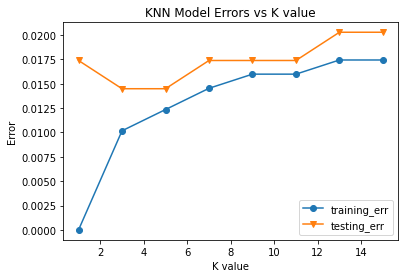

In [30]:
# Plot training error and testing error against k value
plt.plot( 'k_value', 'training_err', data=knn_errors, marker='o')
plt.plot( 'k_value', 'testing_err', data=knn_errors, marker='v')

plt.legend()
plt.title("KNN Model Errors vs K value")
plt.xlabel("K value")
plt.ylabel("Error")

plt.show()

# 3. Cross Validation

## 3.1 Combine dataset

In [31]:
# Combine ziptrain27 and ziptest27.
# Remember to reset the index
zip27 = pd.concat([ziptrain27, ziptest27]).reset_index(drop = True)

## 3.2 Monte Carlo CV for Linear Regression and KNN

In [32]:
# Define a function to calculate error
def calc_error(pred, actual):
    return sum(pred != actual) / len(pred)

In [33]:
# Define CV parameters
B = 100
n = 1376

# Create a dictionary to store CV results
TEs = {'LR_train_err':[], 'LR_test_err':[], 
       'KNN1_train_err':[], 'KNN1_test_err':[],
      'KNN3_train_err':[], 'KNN3_test_err':[],
      'KNN5_train_err':[], 'KNN5_test_err':[],
      'KNN7_train_err':[], 'KNN7_test_err':[],
      'KNN9_train_err':[], 'KNN9_test_err':[],
      'KNN11_train_err':[], 'KNN11_test_err':[],
      'KNN13_train_err':[], 'KNN13_test_err':[],
      'KNN15_train_err':[], 'KNN15_test_err':[]}


In [34]:
# Perform Monte Carlo CV
for i in tqdm(range(B)):
    # Randomly split the dataset
    # The ratios of 2 and 7 in the training set and the testing set are the same as the population ratio
    temp_ziptrain27 = zip27.groupby(0, group_keys = False).apply(lambda x: x.sample(frac = n/zip27.shape[0]))
    temp_ziptest27 = zip27.drop(labels = temp_ziptrain27.index)
    
    temp_X_train = temp_ziptrain27.iloc[:, 1:257]
    temp_Y_train = temp_ziptrain27.iloc[:, 0]

    temp_X_test = temp_ziptest27.iloc[:, 1:257]
    temp_Y_test = temp_ziptest27.iloc[:, 0]
    
    # Perform Linear Regression
    lr = LinearRegression(n_jobs = -1)
    lr.fit(temp_X_train, temp_Y_train)
    lr_Y_train_pred = [7 if x>=4.5 else 2 for x in lr.predict(temp_X_train)]
    lr_Y_test_pred = [7 if x>=4.5 else 2 for x in lr.predict(temp_X_test)]
    # Calculate trainging error and testing error for Linear Regression
    TEs['LR_train_err'].append(calc_error(lr_Y_train_pred, temp_Y_train))
    TEs['LR_test_err'].append(calc_error(lr_Y_test_pred, temp_Y_test))
    
    # Perform KNN
    for k in range(1, 17, 2):
        # Create a KNN classifier
        temp_knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        temp_knn.fit(temp_X_train, temp_Y_train)

        # Make prediction using X_train
        knn_Y_train_pred = temp_knn.predict(temp_X_train)
        # Make prediction using X_test
        knn_Y_test_pred = temp_knn.predict(temp_X_test)
        # Calculate training error and testing error for KNN
        TEs['KNN'+str(k)+'_train_err'].append(calc_error(knn_Y_train_pred, temp_Y_train))
        TEs['KNN'+str(k)+'_test_err'].append(calc_error(knn_Y_test_pred, temp_Y_test))


  0%|          | 0/100 [00:00<?, ?it/s]

In [35]:
# Convert the dictionary to a DataFrame
CV_result = pd.DataFrame(TEs)

In [36]:
# Visualize CV results for training error
train_err_cols = [x for x in range(0, 18, 2)]

Text(0.5, 1.0, 'Monte Carlo CV Result for Training Error')

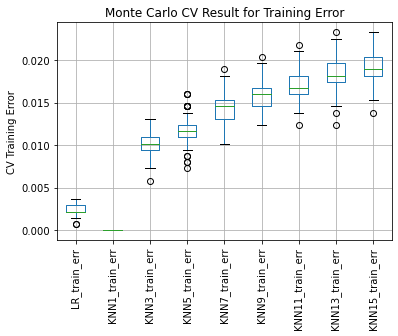

In [37]:
# Plot the training error
CV_result.iloc[:,train_err_cols].boxplot()
plt.xticks(rotation=90)
plt.ylabel("CV Training Error")
plt.title("Monte Carlo CV Result for Training Error")

In [38]:
# Visualize CV results for testing error
test_err_cols = [x for x in range(1, 18, 2)]

Text(0.5, 1.0, 'Monte Carlo CV Result for Testing Error')

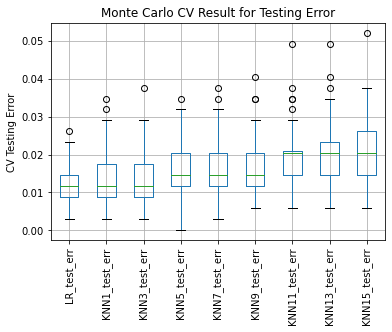

In [39]:
# Plot the testing error
CV_result.iloc[:,test_err_cols].boxplot()
plt.xticks(rotation=90)
plt.ylabel("CV Testing Error")
plt.title("Monte Carlo CV Result for Testing Error")